In [9]:
import pandas as pd 
from pandas import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option('display.max_columns', None)

In [10]:
dir = Path().cwd().parent / 'data' / 'raw'
train_path = dir / 'train.csv'
test_path = dir / 'test.csv'

In [11]:
train_df = pd.read_csv(train_path, index_col='Id')
test_df = pd.read_csv(test_path, index_col='Id')

In [12]:
test_df.shape

(1459, 79)

In [13]:
train_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [15]:
# check for missing value pct
missing_vals = train_df.isnull().sum().sort_values(ascending=False)
missing_vals_pct = (missing_vals/ len(train_df) * 100).round(2)

missing_df = pd.DataFrame({'missing_vals': missing_vals, 'missing_vals_pct': missing_vals_pct}).head(19)
missing_df

,missing_vals,missing_vals_pct
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55


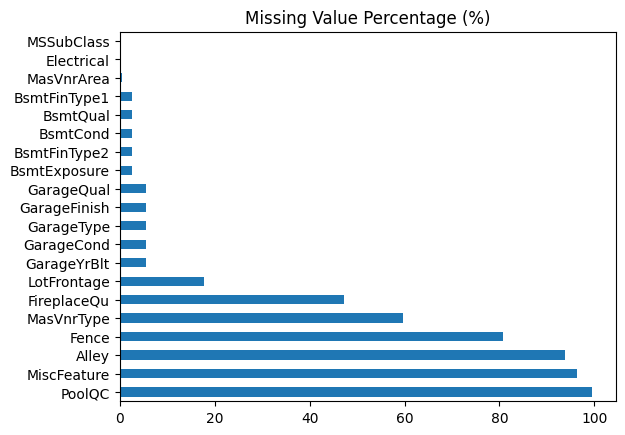

In [16]:
missing_vals_pct.head(20).plot(kind='barh')
plt.title('Missing Value Percentage (%)')
plt.show()

In [17]:
def impute_mass_area(df: pd.DataFrame) -> pd.DataFrame:
    df.loc[:, 'MasVnrArea'] = df['MasVnrArea'].fillna(0)
    return df

In [18]:
def impute_lot_frontage(df: pd.DataFrame) -> pd.DataFrame:
    df.loc[:, 'LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
    return df

In [19]:
def impute_garage_year(df: pd.DataFrame) -> pd.DataFrame:
    df.loc[:, 'GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
    return df

In [20]:
features_nom = [
    "MSSubClass",
    "MSZoning",
    "Street",
    "Alley",
    "LandContour",
    "LotConfig",
    "Neighborhood",
    "Condition1",
    "Condition2",
    "BldgType",
    "HouseStyle",
    "RoofStyle",
    "RoofMatl",
    "Exterior1st",
    "Exterior2nd",
    "MasVnrType",
    "Foundation",
    "Heating",
    "CentralAir",
    "GarageType",
    "MiscFeature",
    "SaleType",
    "SaleCondition",
]

five_levels = ["Po", "Fa", "TA", "Gd", "Ex"]
ten_levels = list(range(1, 11))

ordered_levels = {
    "OverallQual": ten_levels,
    "OverallCond": ten_levels,
    "ExterQual": five_levels,
    "ExterCond": five_levels,
    "BsmtQual": five_levels,
    "BsmtCond": five_levels,
    "HeatingQC": five_levels,
    "KitchenQual": five_levels,
    "FireplaceQu": five_levels,
    "GarageQual": five_levels,
    "GarageCond": five_levels,
    "PoolQC": five_levels,
    "LotShape": ["Reg", "IR1", "IR2", "IR3"],
    "LandSlope": ["Sev", "Mod", "Gtl"],
    "BsmtExposure": ["No", "Mn", "Av", "Gd"],
    "BsmtFinType1": ["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "BsmtFinType2": ["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "Functional": ["Sal", "Sev", "Maj1", "Maj2", "Mod", "Min2", "Min1", "Typ"],
    "GarageFinish": ["Unf", "RFn", "Fin"],
    "PavedDrive": ["N", "P", "Y"],
    "Utilities": ["NoSeWa", "NoSewr", "AllPub"],
    "CentralAir": ["N", "Y"],
    "Electrical": ["Mix", "FuseP", "FuseF", "FuseA", "SBrkr"],
    "Fence": ["MnWw", "GdWo", "MnPrv", "GdPrv"],
}

ordered_levels = {key: ["None"] + value for key, value in ordered_levels.items()}

In [21]:
def ordinal_encoder(
    df: pd.DataFrame,
) -> pd.DataFrame:

    # ordered_levels = {key: ["None"] + value for key, value in ordered_levels.items()}

    # for col in df.select_dtypes(include="object").columns:
    #     if col not in list(ordered_levels.keys()):
    #         df[col] = df[col].astype("category")
    #         if "None" not in df[col].cat.categories:
    #             df[col] = df[col].cat.add_categories("None")

    # for col, levels in ordered_levels.items():
    #     df[col] = df[col].astype(CategoricalDtype(categories=levels, ordered=True))
    
    # Nominal categories
    for name in features_nom:
        df[name] = df[name].astype("category")
        # Add a None category for missing values
        if "None" not in df[name].cat.categories:
            df[name] = df[name].cat.add_categories("None")
    # Ordinal categories
    for name, levels in ordered_levels.items():
        df[name] = df[name].astype(CategoricalDtype(levels,
                                                    ordered=True))

    return df

In [22]:
def impute_cat_cols(df: pd.DataFrame) -> pd.DataFrame:
    cols = df.select_dtypes(include=['object']).columns
    df[cols] = df[cols].fillna('None')
    return df

In [23]:
def drop_id_col(df: pd.DataFrame) -> pd.DataFrame:
    df = df.drop('Id', axis=1)
    return df

In [24]:
def pipeline(df: pd.DataFrame) -> pd.DataFrame:
    return (
        # df.pipe(drop_id_col)
        df.pipe(impute_cat_cols)
        .pipe(impute_mass_area)
        .pipe(impute_lot_frontage)
        .pipe(impute_garage_year)
        .pipe(ordinal_encoder)
    )

In [25]:
pro_train_df = pipeline(train_df)
pro_test_df = pipeline(test_df)

In [26]:
def save_data(df: pd.DataFrame, dir: str, file: str) -> None:
    """Save a dataframe to a chosen directory.

    Args:
        df (pd.DataFrame): pandas dataframe
        dir (str): directory to save the file
        file (str): file name
    """
    file_dir = Path.cwd().parent / "data" / dir 
    if not file_dir.exists():
        file_dir.mkdir(parents=True, exist_ok=True)
    df.to_pickle(file_dir / file)

In [27]:
save_data(pro_train_df, 'processed', 'pro_train.pkl')
save_data(pro_test_df, 'processed', 'pro_test.pkl')